# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#!pip install matplotlib==3.4

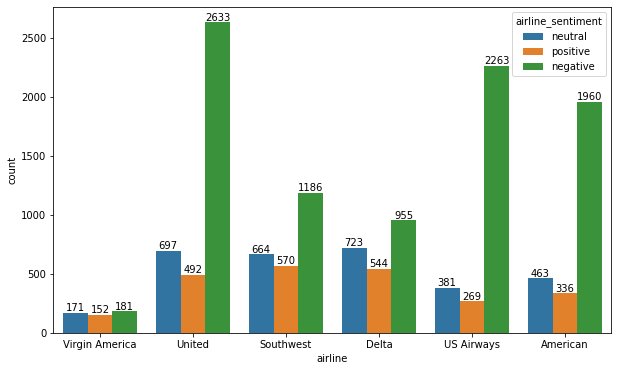

In [4]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

In [117]:
import plotly.express as px
fig = px.bar(df, x ="airline", color = "airline_sentiment")
fig.show()

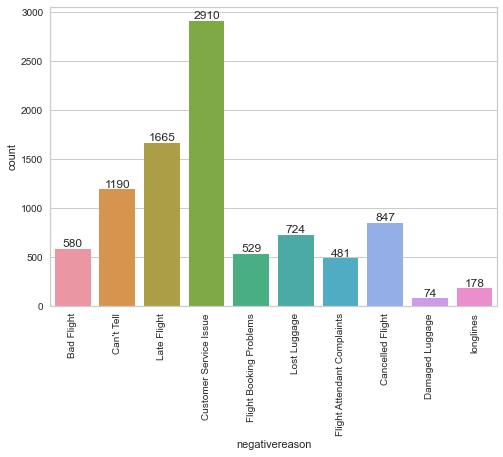

In [114]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);


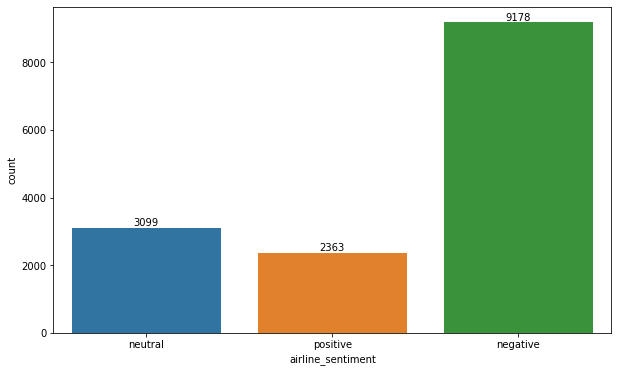

In [6]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

In [7]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [8]:
df2 = df.copy()

In [9]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Cleaning Data

In [10]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()
# \s --> bosluk haric tum karakterler, http ile baslayip bosluk gorene kadar tamamen silecek
# textlerin basinda sonundaki bosluklari silmek icin, once ve sonraki bosluklari silmeyi unutma! 

s

'#lateflight @airlines'

In [11]:
s = re.sub("#\S+", "", s)
s
# hashtag ile baslayan-bosluga kadar olan tum karakterleri sil

' @airlines'

In [12]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [13]:
#nltk.download('stopwords')

In [14]:
#nltk.download('wordnet')
#nltk.download('punkt')

In [ ]:
# negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't",'didn', "didn't", 'doesn',
#                             "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
#                             'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn',
#                             "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', ,"won't", 'wouldn', "wouldn't"]

In [15]:
#  code 15: 
# stop_words = stopwords.words('english')

# for i in negative_auxiliary_verbs:
#         stop_words.remove(i) 

In [ ]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [16]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [
        WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw
    ]

    #joining
    return " ".join(text_cleaned)

In [17]:
cleaning_text = df2["text"].apply(cleaning)
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [18]:
df2 = df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df2["text"]
y = df2["airline_sentiment"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.1 bile yapabiliriz
                                                    # train datamin olabildigince buyuk olmasi lazim 
                                                    stratify=y,
                                                    random_state=101)

In [119]:
X_train # temizleme islemini henuz yapmadik

12713    @AmericanAir thanks to your attendant on fligh...
9305     Great management of @USAirways twitter account...
9726     @USAirways @PHLAirport always nice when a cust...
4751     @SouthwestAir bag in possession but no clothes...
14102    @AmericanAir You have the worst customer servi...
                               ...                        
6570     @SouthwestAir used to love you, but you keep r...
880          @united like continental's chicken feat fairs
10563    Hey @USAirways based on the number of retweets...
3924     @united The link in the message I was replying...
11333    @USAirways you run a piece of shit airline!!  ...
Name: text, Length: 11712, dtype: object

## Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
vectorizer = CountVectorizer(preprocessor=cleaning, # yukarida tanimladigimiz fonksiyonu yazdik 
                             # sayisal forma donustururken, ayni zamanda yukarda tanimlanan temizligi yapiyor
                            min_df=3)  # 3 veya daha az gecen tokenleri ignore et. 
                            #     ngram_range=(1,2) --> 
                            #     max_features= 1500 --> 1500'den fazla gecen tokeni ignore et (onerilmez)
                             
# train setindeki uniqe tokenlerle model belirlendigi icin, testte bazen istenilen verim alanamayabilir

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

---
ngram_range=(1,2) 
- Ahmet telefonu cok begendi
- 4 tokenim ngram_range=2  ile 3'e dustu , (1,2) denilirse hem tek tek hem ikili gruplarla inceler 
- max (1,3) olabilir onda da feature sayisi ve maliyet cok artar
- ikiserli gruplara ayrilarak kelime gruplarini yakalamak icin 
- 
- ngram kullanmanin sonuca cok buyuk etkisi var ise, datanin kucuk oldugunu gosterir 
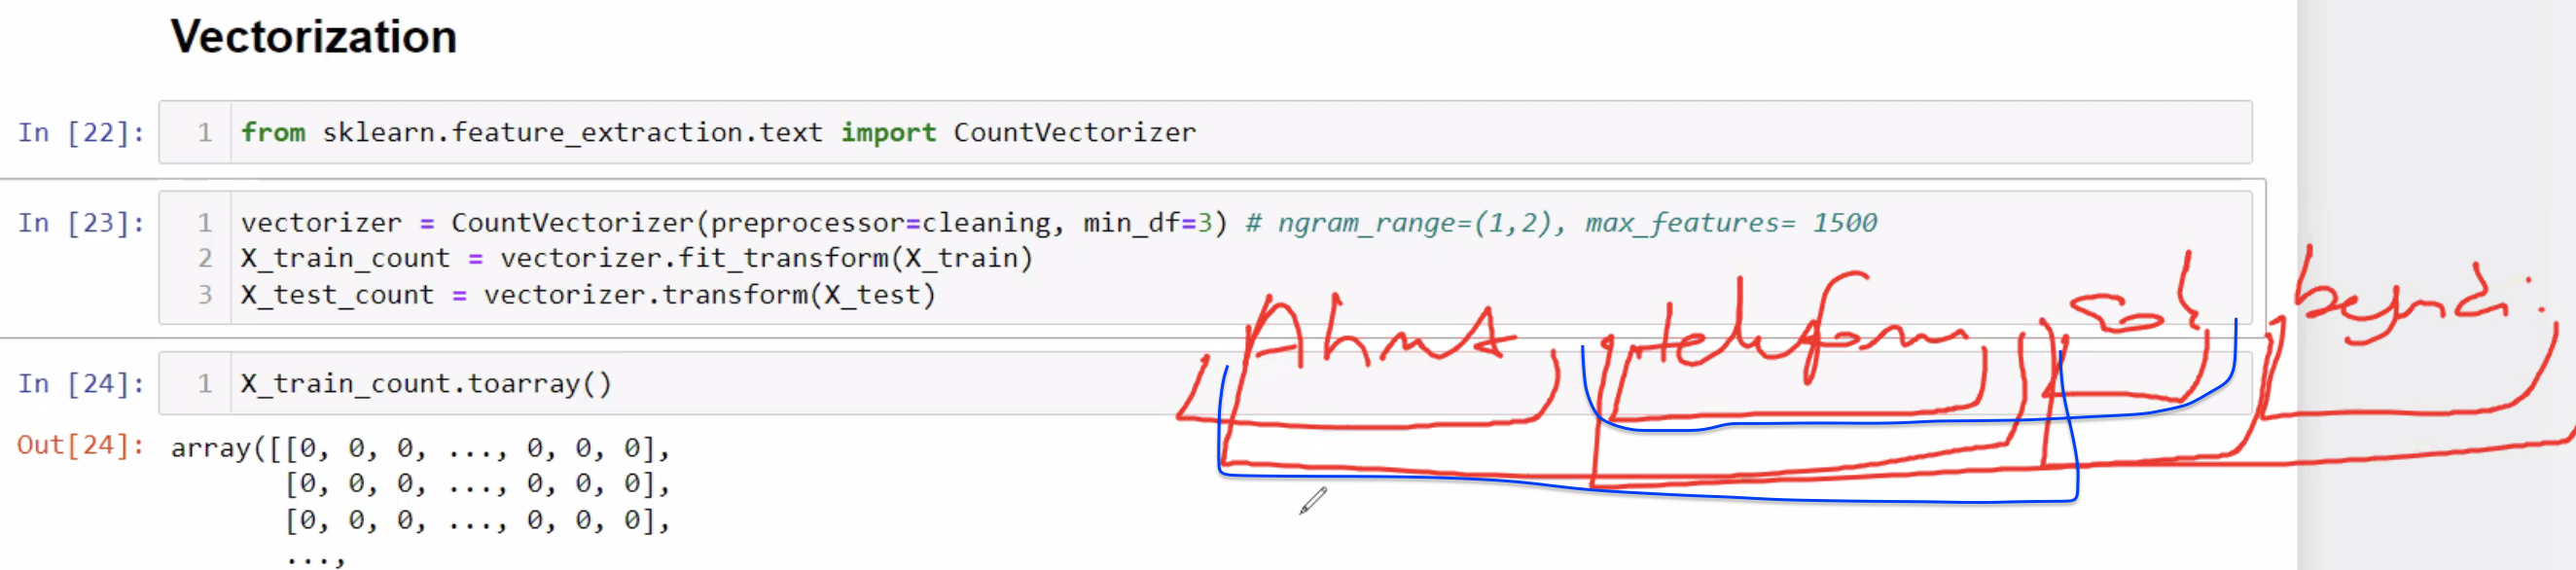

---

In [125]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [126]:
pd.DataFrame(X_train_count.toarray(),
             columns=vectorizer.get_feature_names_out())
#  3126 columns, feature olustu
# eger  min_df=3 kaldirsaydik  7757 columns olurdu 

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,...,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [27]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

## Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB  # BernoulliNB for binary model

In [143]:
nb = MultinomialNB(alpha=10) # default alpha=1.0
# alpha--> yumusatma parametresi 
# alpha Overfitting'i gidermek icin kullanilan tek parametre (scorelari iyilestirmez)
# alpha olabildigince kucuk olmali, diger labellerimde skorelari bozabilir

nb.fit(X_train_count, y_train)

MultinomialNB(alpha=10)

alpha, bayes kullanimi
- sifir olarak gecen her bir tokene, corpus'a gore, belli bir oranda olasilik tahsis ediyor 
- alpha normalde 1.0, alpha buyudukce veya kuculdukce sifirlar sonsuz degere ulasabiliyor 
- farkli degerler vererek overfitting gidermeye calisiyoruz 
- **Overfitting**'i gidermek icin kullanilan tek parametre **(scorelari iyilestirmez)**
- alpha olabildigince kucuk olmali, diger labellerimde skorelari bozabilir
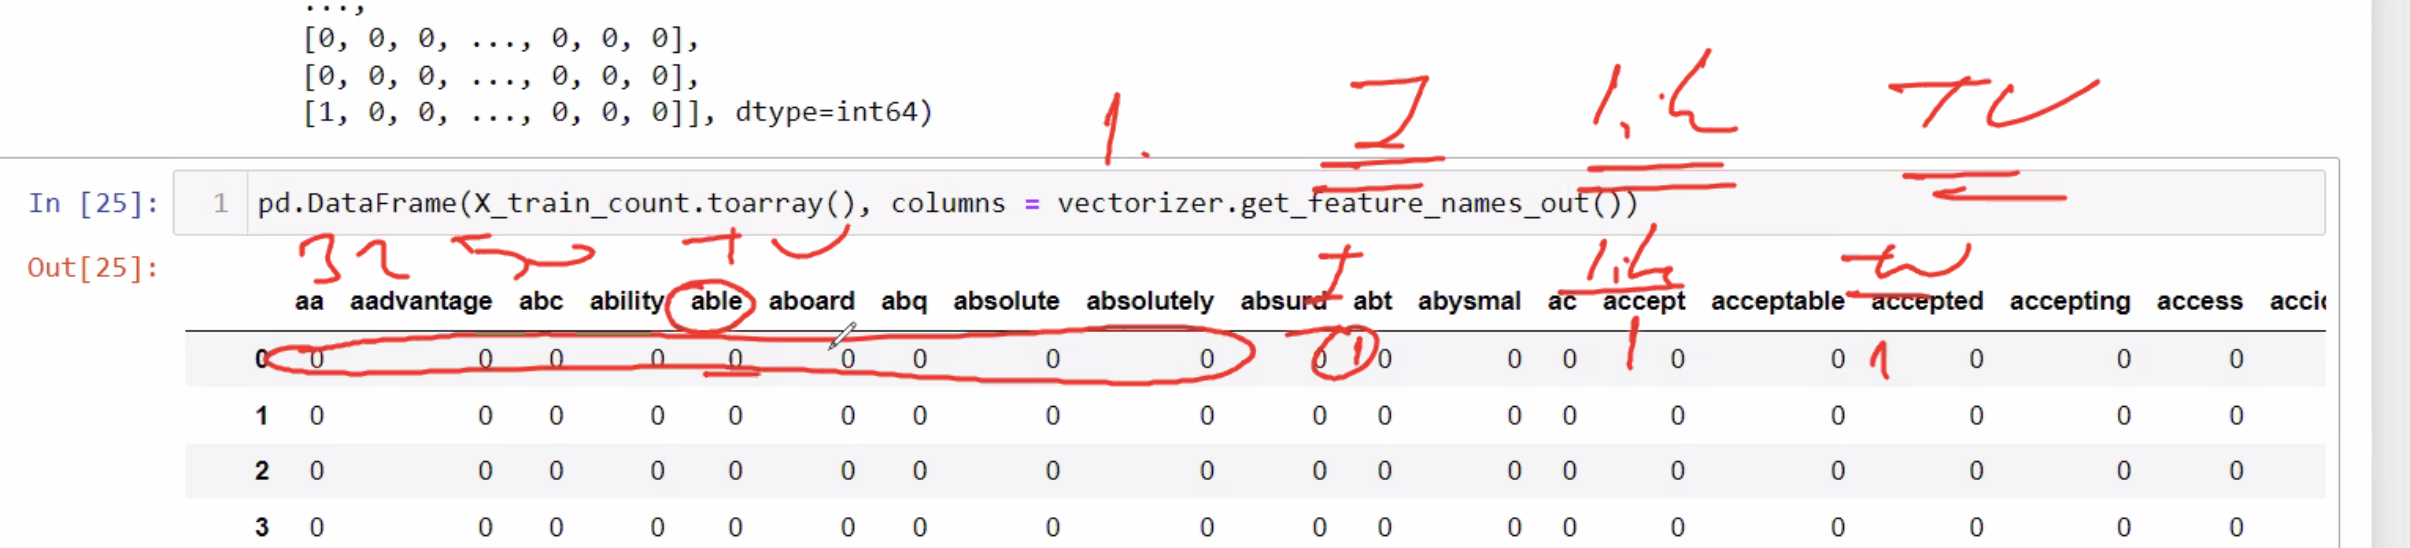

---
---

In [144]:
print("NB MODEL") # MultinomialNB, BernoulliNB ikisini de deneyip hangisi iyi sonuc veriyorsa onunla ilerleyelim

eval(nb, X_train_count, X_test_count)

NB MODEL
[[1793   27   15]
 [ 467  129   24]
 [ 251   16  206]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83      1835
     neutral       0.75      0.21      0.33       620
    positive       0.84      0.44      0.57       473

    accuracy                           0.73      2928
   macro avg       0.77      0.54      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      7343
     neutral       0.80      0.25      0.38      2479
    positive       0.86      0.44      0.58      1890

    accuracy                           0.74     11712
   macro avg       0.79      0.56      0.60     11712
weighted avg       0.76      0.74      0.70     11712



---

hedef label ne ise onun skorelari uzerinden overfitting degerlendirmesi yapariz 
- burada hedef negatif 
- recall olabildigince yuksek (1. hedef)
- precision da olabildigince yuksek  (2. hedef)
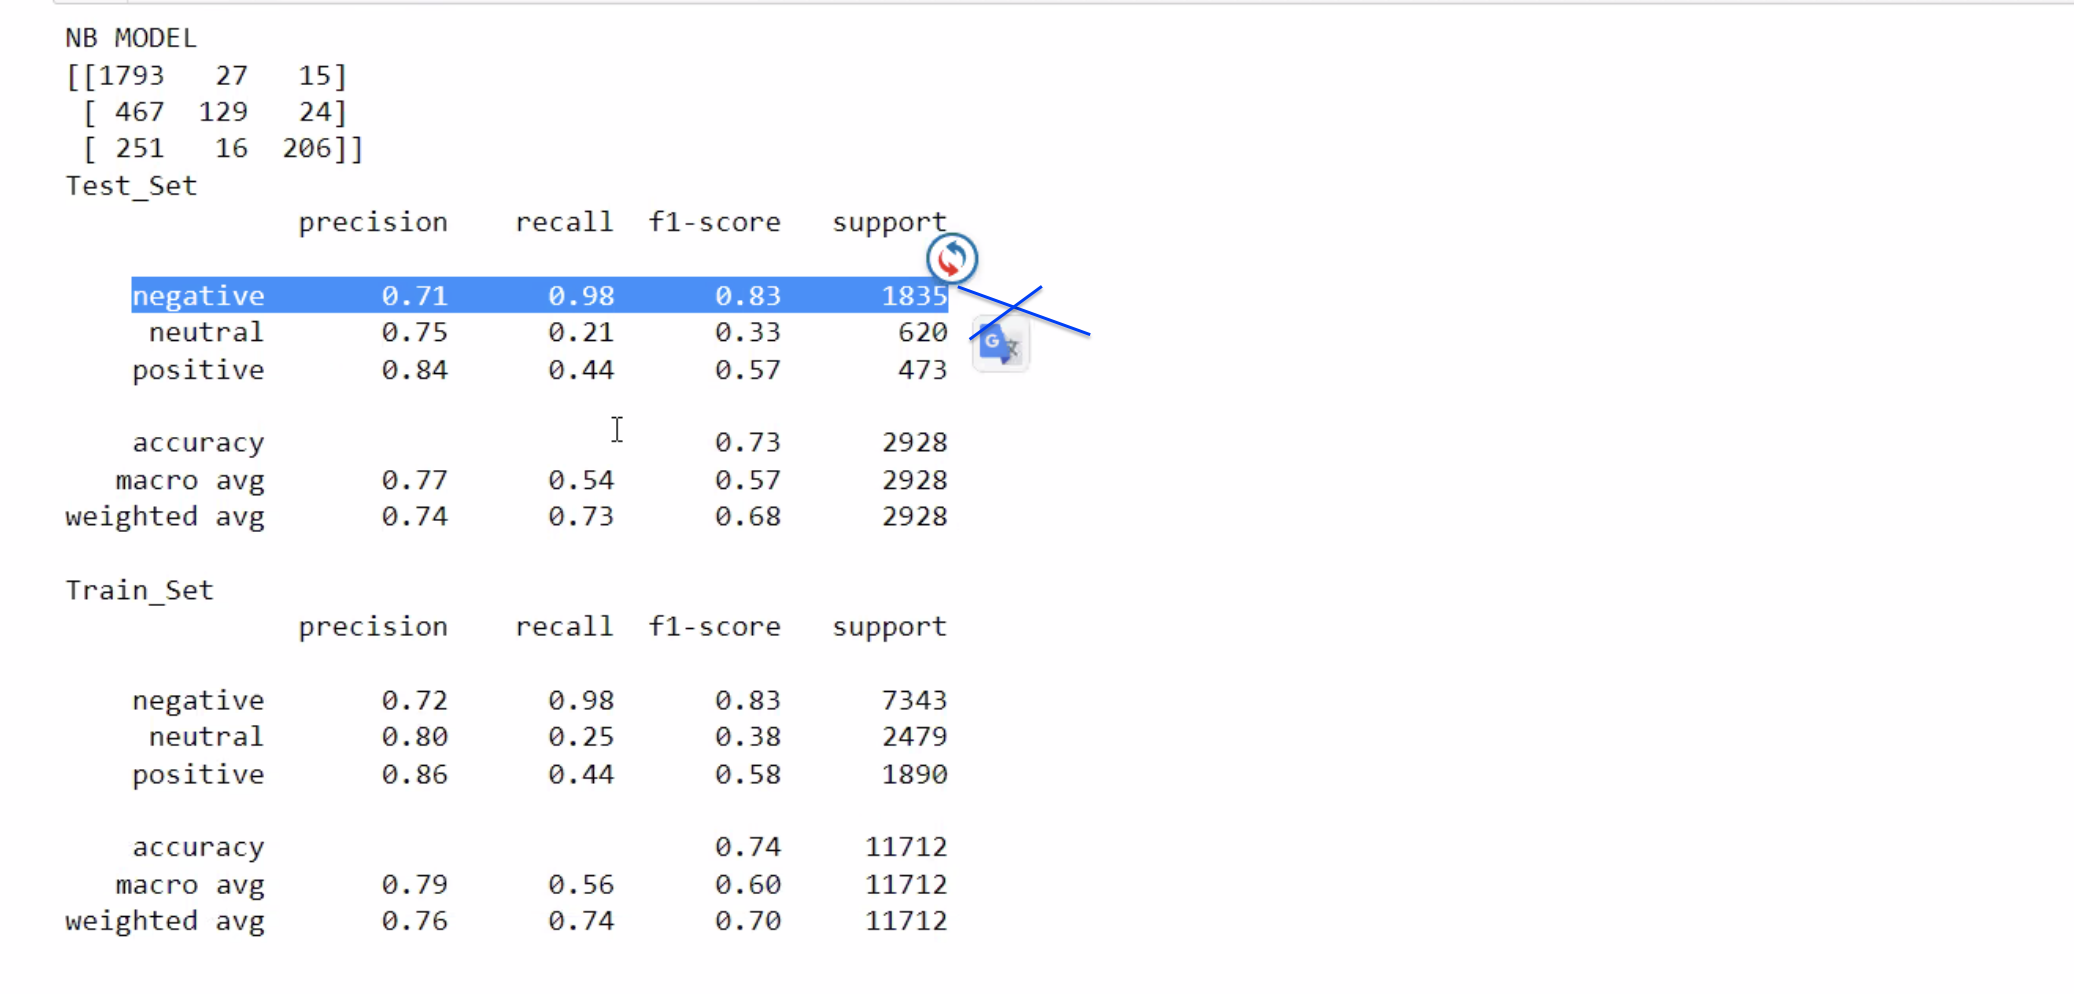
---
sample: 
- precision 0.2 olsaydi, 1000 kiside 500 kisi hasta ( 100/x = 0.2)
- precision 0.3 olsaydi, 1000 kiside 333 kisi hasta diyerek, 333 icince kanserli hastalari arardim. 

---
- multiclasslarda recall,precision kullanamiyorum
- tek bir labelin degerini gormek istiyorsam **make_scorer** kullanirim

---
Asagidaki scoring incelemesi: 
- precision_score() icerisindeki functionlari kullanabilirim
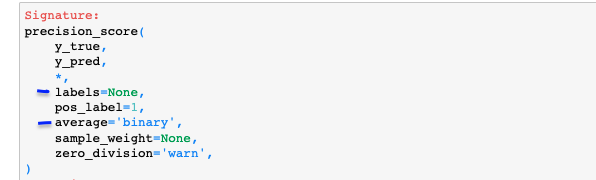

In [145]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score), # icine ilave parametre olabilir
           # skore func icinde gecen functionlari ilave edebilirim (yukaridaki aciklama)
           
           'precision-neg': make_scorer(precision_score,
                                        average=None, # macro,micro vb olabilir
                                        labels=["negative"]), 
                                       # tek bir lebel oldugu icin average yazmam lazim 
           
           'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
           'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=10) #model belirlerken verdigin alpha ile ayni olsun

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores,
                         index = range(1, 11))

df_scores.mean()[2:]
# skorelarin tutarli olup olmadigina bakariz
#               precision    recall  f1-score   support
#  negative       0.71      0.98      0.83      1835

test_accuracy         0.714482
test_precision-neg    0.704816
test_recall-neg       0.978891
test_f1-neg           0.819534
dtype: float64

In [142]:
df_scores # normalde 0dan baslar, ama ben ozellikle 2'den baslamasini istiyorum

,fit_time,score_time,test_accuracy,test_precision-neg,test_recall-neg,test_f1-neg
1,0.022355,0.013110,0.761092,0.775395,0.934694,0.847625
2,0.021676,0.013028,0.761092,0.779932,0.930612,0.848635
3,0.022959,0.013358,0.760888,0.780712,0.925170,0.846824
4,0.020243,0.012478,0.763450,0.783063,0.919619,0.845865
5,0.020291,0.011980,0.744663,0.768884,0.929155,0.841456
6,0.020956,0.012037,0.750640,0.773672,0.912807,0.837500
7,0.020405,0.011032,0.746371,0.764838,0.930518,0.839582
8,0.019887,0.010488,0.751494,0.780630,0.911444,0.840981
9,0.020848,0.011919,0.752348,0.770455,0.923706,0.840149
10,0.020024,0.010616,0.752348,0.777778,0.915531,0.841051


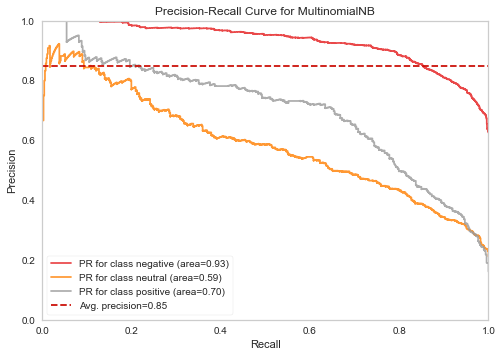

In [147]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_, # class isimlerini yazdirmasi icin ekliyoruz 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [148]:
y_pred = nb.predict(X_test_count)

nb_count_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"], 
                                # multiclass oldugu icin label ve average belirtmeliyim
                                average=None)

nb_count_f1_neg = f1_score(y_test,
                           y_pred,
                           labels=["negative"],
                           # multiclass oldugu icin label ve average belirtmeliyim
                           average=None)


nb_AP_neg = viz.score_["negative"]  # sadece

## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.02, # overfittingi giderir (default C=1.0)
                         # ne kadar kucuk olursa, uyguladigi regresyon katsayisi o kadar buyuk olur 
                         
                         max_iter=1000)  # max_iter ile ilgili hata alirsan bu degeri arttir
                        #class_weight='balanced' # notr ve pozitif onemsiz oldugu icin kullanmadik
                        # sadece neg label kullandigimiz icin burada ihtiyac yok


log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [150]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1759   40   36]
 [ 366  211   43]
 [ 177   47  249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.71      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.74      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.41      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [151]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.745731
test_precision-neg    0.747621
test_recall-neg       0.963501
test_f1-neg           0.841924
dtype: float64

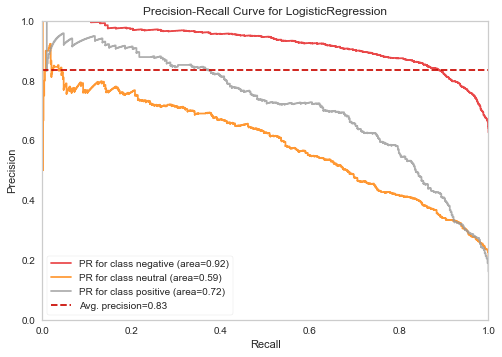

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [152]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.02, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [153]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
log_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
log_AP_neg = viz.score_["negative"]

In [154]:
log = LogisticRegression(C=0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [155]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1302  435   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.71      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



## SVM

In [156]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01) # deneme-yanilma c degeri ile oynayarak overfitting gideririz 
svc.fit(X_train_count, y_train)

LinearSVC(C=0.01)

In [157]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)
# overfittingi sadece neg label degerlerine bakarak degerlendiriyoruz

SVC MODEL
[[1711   80   44]
 [ 291  279   50]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [158]:
model = LinearSVC(C=0.01)

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]
# degerler tutarli
#              precision    recall  f1-score   support
# negative       0.80      0.93      0.86      1835

test_accuracy         0.777494
test_precision-neg    0.799702
test_recall-neg       0.939396
test_f1-neg           0.863922
dtype: float64

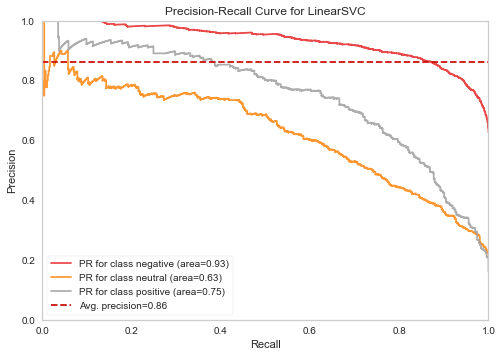

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [159]:
viz = PrecisionRecallCurve(LinearSVC(C=0.01),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [160]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

svc_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)

svc_AP_neg = viz.score_["negative"]

## KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count, y_train)

KNeighborsClassifier(n_neighbors=7)

In [162]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[912 839  84]
 [113 447  60]
 [ 46 178 249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.50      0.63      1835
     neutral       0.31      0.72      0.43       620
    positive       0.63      0.53      0.58       473

    accuracy                           0.55      2928
   macro avg       0.60      0.58      0.54      2928
weighted avg       0.70      0.55      0.58      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.62      0.73      7343
     neutral       0.39      0.82      0.53      2479
    positive       0.70      0.56      0.62      1890

    accuracy                           0.65     11712
   macro avg       0.66      0.66      0.63     11712
weighted avg       0.76      0.65      0.67     11712



In [163]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.530654
test_precision-neg    0.846802
test_recall-neg       0.466436
test_f1-neg           0.601124
dtype: float64

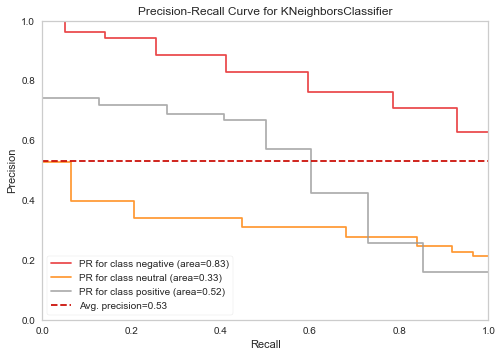

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [164]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [165]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100,
                            max_depth=40, # OVERFITTINGE EN BUYUK MUDAHELE 
                            random_state=42,
                            n_jobs=-1)  # class_weight="balanced"

rf.fit(X_train_count, y_train)
# vakit kisitliysa bagging, boosting modellerinde max_dept ile oynayarak overfitting giderebiliriz

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [167]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1798   11   26]
 [ 523   59   38]
 [ 219    7  247]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.77      0.10      0.17       620
    positive       0.79      0.52      0.63       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.20      0.34      2479
    positive       0.92      0.63      0.75      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.64     11712
weighted avg       0.82      0.77      0.72     11712



In [168]:
model = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.710040
test_precision-neg    0.698911
test_recall-neg       0.984338
test_f1-neg           0.817418
dtype: float64

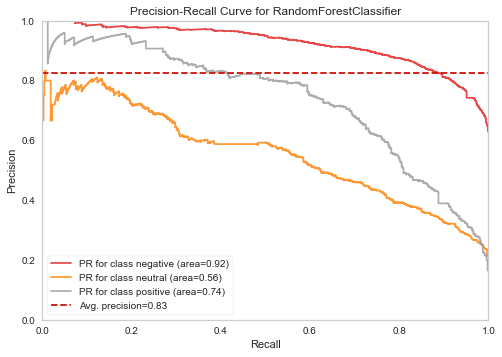

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [169]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,
                                                  max_depth=40,
                                                  random_state=42,
                                                  n_jobs=-1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [170]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
rf_AP_neg = viz.score_["negative"]

In [171]:
rf = RandomForestClassifier(100,
                            max_depth=40,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [172]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1455  305   75]
 [ 152  403   65]
 [  53   97  323]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      1835
     neutral       0.50      0.65      0.57       620
    positive       0.70      0.68      0.69       473

    accuracy                           0.74      2928
   macro avg       0.69      0.71      0.70      2928
weighted avg       0.77      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.97      0.85      0.91      7343
     neutral       0.64      0.90      0.75      2479
    positive       0.87      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.86      0.86     11712



## Ada Boost

In [173]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=500, random_state=42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [174]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1555  205   75]
 [ 210  339   71]
 [  86   72  315]]
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      1835
     neutral       0.55      0.55      0.55       620
    positive       0.68      0.67      0.67       473

    accuracy                           0.75      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      7343
     neutral       0.61      0.62      0.62      2479
    positive       0.79      0.71      0.75      1890

    accuracy                           0.80     11712
   macro avg       0.75      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [175]:
model = AdaBoostClassifier(n_estimators=500, random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.759136
test_precision-neg    0.842861
test_recall-neg       0.856597
test_f1-neg           0.849649
dtype: float64

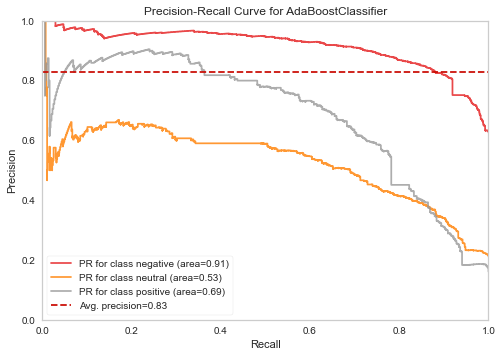

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [176]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=500,
                                              random_state=42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [177]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
ada_AP_neg = viz.score_["negative"]

## TF-IDF

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [180]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [181]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns=tf_idf_vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,...,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

## Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [68]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1802   25    8]
 [ 426  172   22]
 [ 248   31  194]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1835
     neutral       0.75      0.28      0.41       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.74      2928
   macro avg       0.78      0.56      0.60      2928
weighted avg       0.76      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7343
     neutral       0.84      0.35      0.50      2479
    positive       0.91      0.51      0.65      1890

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



In [69]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.731643
test_precision-neg    0.721593
test_recall-neg       0.978890
test_f1-neg           0.830756
dtype: float64

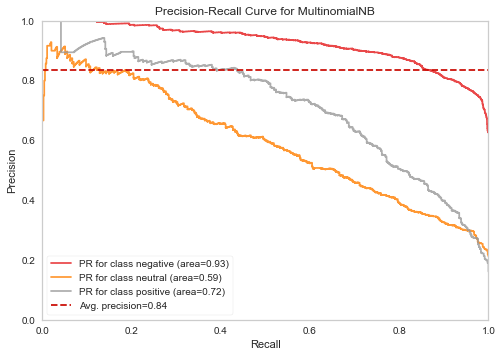

In [70]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [71]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
nb_tfidf_AP_neg = viz.score_["negative"]

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.4,
                         max_iter=1000)

log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [73]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 332  256   32]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.41      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.69      2928
weighted avg       0.78      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.82      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [74]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.771432
test_precision-neg    0.776135
test_recall-neg       0.960506
test_f1-neg           0.858515
dtype: float64

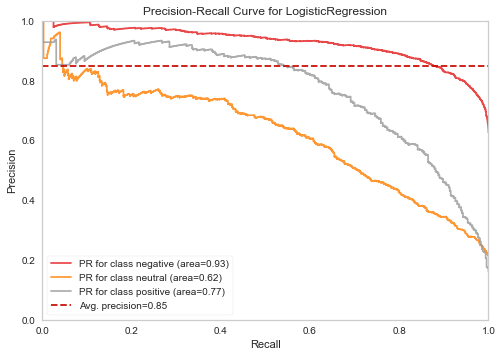

In [75]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.4, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [76]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

log_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
log_tfidf_AP_neg = viz.score_["negative"]

In [77]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [78]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1432  304   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



## SVM

In [79]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.1)

In [80]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1737   64   34]
 [ 312  263   45]
 [ 124   44  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.64      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [81]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.781934
test_precision-neg    0.790352
test_recall-neg       0.956965
test_f1-neg           0.865677
dtype: float64

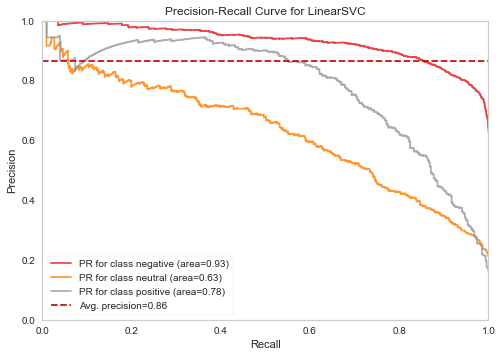

In [82]:
viz = PrecisionRecallCurve(LinearSVC(C=0.1),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [83]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
svc_tfidf_AP_neg = viz.score_["negative"]

## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [85]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[ 259 1563   13]
 [  57  549   14]
 [  42  335   96]]
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.14      0.24      1835
     neutral       0.22      0.89      0.36       620
    positive       0.78      0.20      0.32       473

    accuracy                           0.31      2928
   macro avg       0.58      0.41      0.31      2928
weighted avg       0.63      0.31      0.28      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.28      0.43      7343
     neutral       0.26      0.92      0.41      2479
    positive       0.83      0.24      0.37      1890

    accuracy                           0.41     11712
   macro avg       0.65      0.48      0.40     11712
weighted avg       0.73      0.41      0.41     11712



In [86]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.302765
test_precision-neg    0.723823
test_recall-neg       0.139858
test_f1-neg           0.233937
dtype: float64

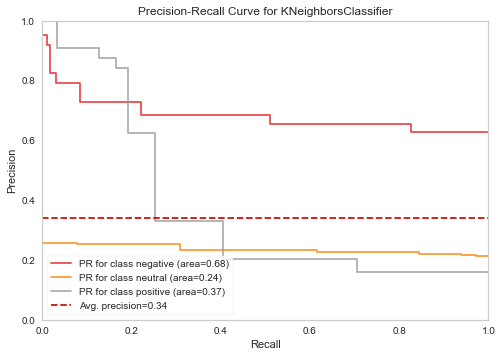

In [87]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [88]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
knn_tfidf_AP_neg = viz.score_["negative"]

## RandomForest

In [89]:
rf = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
# mox_dept olmasaydi overfitting sonuc cikacakti 
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [90]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1805   10   20]
 [ 532   53   35]
 [ 242    7  224]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.09      0.15       620
    positive       0.80      0.47      0.60       473

    accuracy                           0.71      2928
   macro avg       0.75      0.51      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.21      0.34      2479
    positive       0.94      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.60      0.64     11712
weighted avg       0.82      0.76      0.72     11712



In [91]:
model = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.707565
test_precision-neg    0.694344
test_recall-neg       0.988288
test_f1-neg           0.815631
dtype: float64

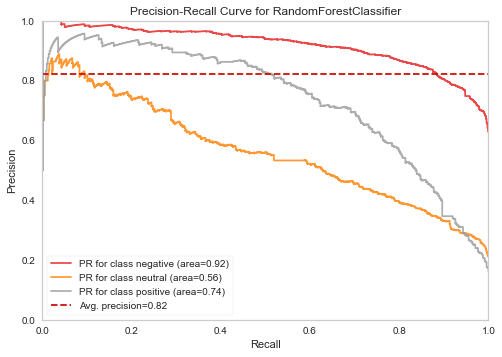

In [92]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,
                                                  max_depth=40,
                                                  random_state=42,
                                                  n_jobs=-1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [93]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)

rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [94]:
rf = RandomForestClassifier(100,
                            max_depth=15,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [95]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1353  386   96]
 [ 129  423   68]
 [  47  108  318]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80      1835
     neutral       0.46      0.68      0.55       620
    positive       0.66      0.67      0.67       473

    accuracy                           0.72      2928
   macro avg       0.67      0.70      0.67      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      7343
     neutral       0.52      0.81      0.63      2479
    positive       0.74      0.72      0.73      1890

    accuracy                           0.77     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.77      0.78     11712



## Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=500, random_state=42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [97]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1536  226   73]
 [ 228  331   61]
 [  98   73  302]]
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1835
     neutral       0.53      0.53      0.53       620
    positive       0.69      0.64      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.67      0.68      2928
weighted avg       0.74      0.74      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      7343
     neutral       0.62      0.62      0.62      2479
    positive       0.83      0.73      0.77      1890

    accuracy                           0.80     11712
   macro avg       0.77      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [98]:
model = AdaBoostClassifier(n_estimators=500, random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.739414
test_precision-neg    0.823474
test_recall-neg       0.842844
test_f1-neg           0.833006
dtype: float64

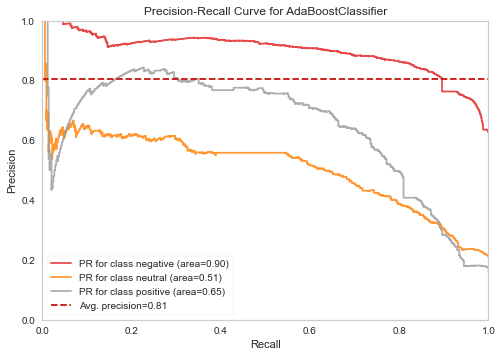

In [99]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=500,
                                              random_state=42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [100]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
ada_tfidf_AP_neg = viz.score_["negative"]

## Compare Scoring

In [182]:
nb_count_rec_neg
# array icinde cikmamasi icin asagidaki formulde 
# nb_count_rec_neg[0] seklinde yazdik 

array([0.97711172])

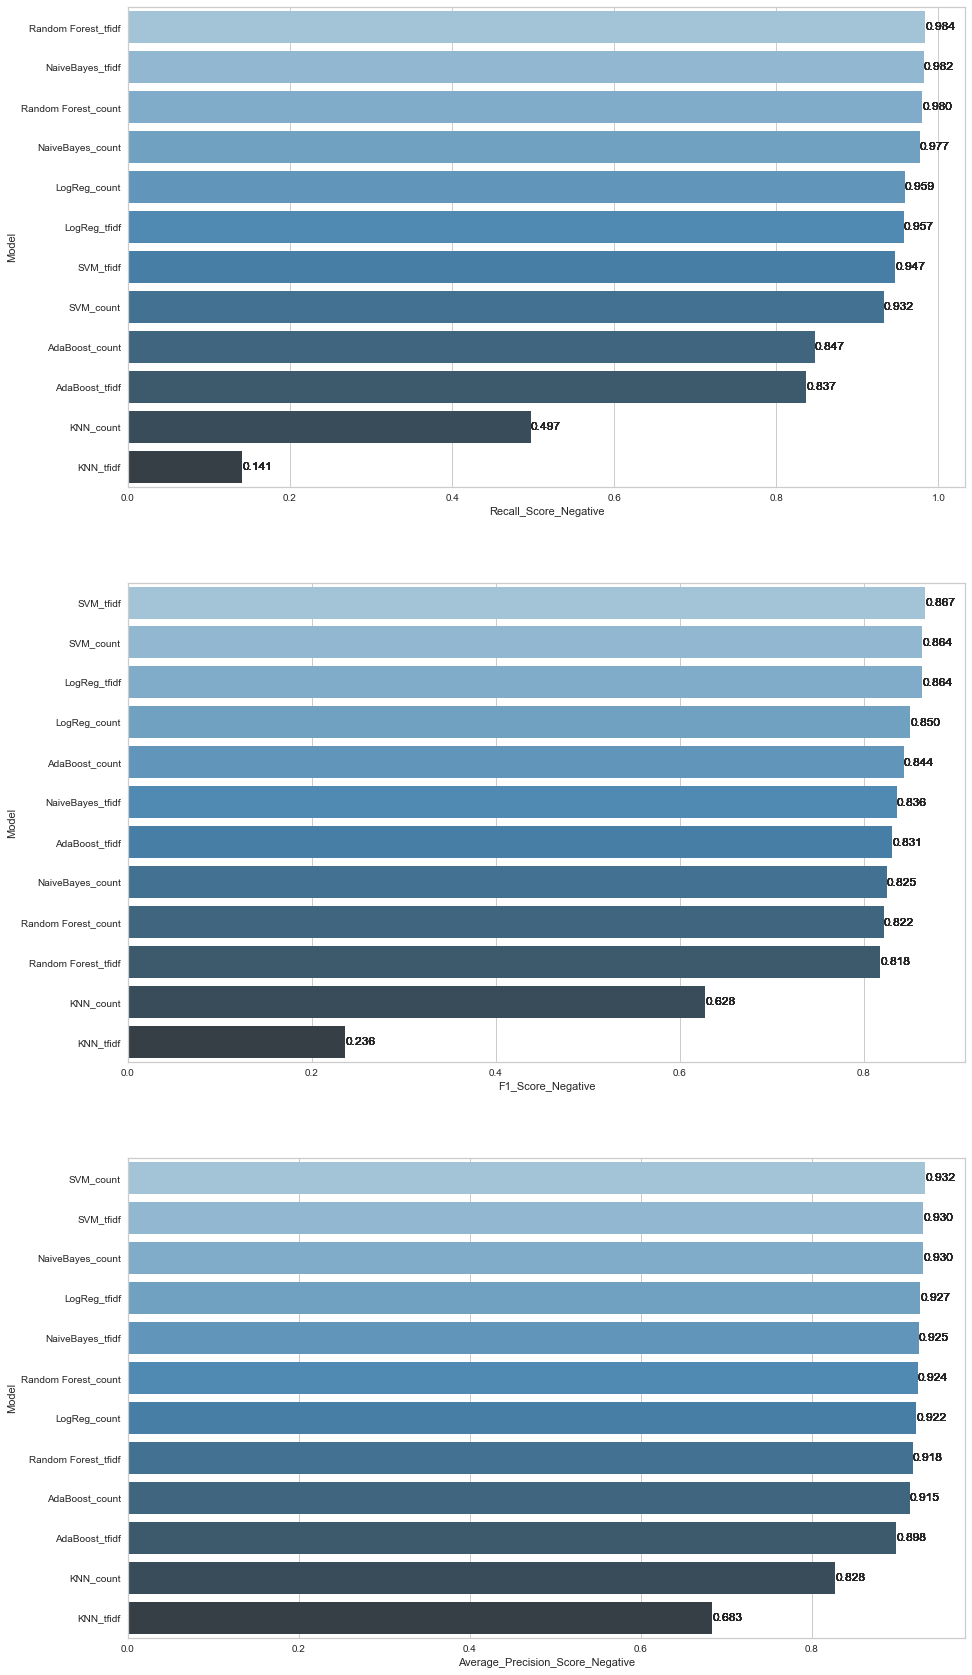

In [101]:
compare = pd.DataFrame({
    "Model": [
        "NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count",
        "Random Forest_count", "AdaBoost_count", "NaiveBayes_tfidf",
        "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", "Random Forest_tfidf",
        "AdaBoost_tfidf"
    ], # tabloda hangi isimlerde gorunmesini istiyorsak onlari verdik
  
    "F1_Score_Negative": [
        nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0],
        knn_count_f1_neg[0], rf_count_f1_neg[0], ada_count_f1_neg[0],
        nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0], svc_tfidf_f1_neg[0],
        knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]
    ], # 
    
    
    "Recall_Score_Negative": [
        nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],
        knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0],
        nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
        knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]
    ],
    "Average_Precision_Score_Negative": [
        nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg, ada_AP_neg,
        nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg, knn_tfidf_AP_neg,
        rf_tfidf_AP_neg, ada_tfidf_AP_neg
    ] # bu degerler arry icinde gelmedigi icin [0] yazmaya gerek kalmadi
})

# tanimlamalari yaptiktan sonra plt.subplot(311) 3 satir 1 sutundan olusan tablo 

def labels(ax):

    for p in ax.patches:
        ax.bar_label(ax.containers[0], fmt="%.3f")


plt.figure(figsize=(15, 30))
plt.subplot(311) # 3 satir 1 sutundan olusan tablonun 1.sini ciz
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax = sns.barplot(x="Recall_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)

plt.subplot(312) # 3 satir 1 sutundan olusan tablonun 2.sini ciz
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax = sns.barplot(x="F1_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)

plt.subplot(313) # 3 satir 1 sutundan olusan tablonun 3.sini ciz
compare = compare.sort_values(by="Average_Precision_Score_Negative",
                              ascending=False)
ax = sns.barplot(x="Average_Precision_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)
plt.show()

# precision da onamli ama biz burada inun yerine f1 skore aldik
# f1 yuksekse precision da yuksektir diye dusunerek onu cizdirmedik

## For New Tweets, prediction with pipeline


In [183]:
from sklearn.pipeline import Pipeline

In [184]:
pipe = Pipeline([('tfidf', TfidfVectorizer(preprocessor=cleaning, min_df=3)),
                 ('log', LogisticRegression(C=0.4, max_iter=1000))])

In [185]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x7f89479ce700>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

## Prediction

In [186]:
tweet = "it was not the worst flight i have ever been."
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [187]:
tweet = "I don't like flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [188]:
tweet = "it is amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [189]:
tweet = "it isn't amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [190]:
tweet = "I don't think I'll ever use American Airlines anymore"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [191]:
tweet = "ok flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['neutral'], dtype=object)

In [206]:
counter = 0
for i, j in enumerate(tweets):
    if "dont" in j and "like" in j and y[i] == "negative":
        counter += 1
print(counter)

30


In [207]:
counter = 0
for i, j in enumerate(tweets):
    if "isnt" in j and "amazing" in j and y[i] == "negative":
        counter += 1
print(counter)

0


## WordCloud - Repetition of Words

## Collect Words

In [197]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [198]:
all_words = " ".join(tweets)

In [199]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [201]:
# pip install wordcloud

In [202]:
from wordcloud import WordCloud

In [203]:
worldcloud = WordCloud(background_color="white", max_words=250)

In [204]:
worldcloud.generate(all_words)

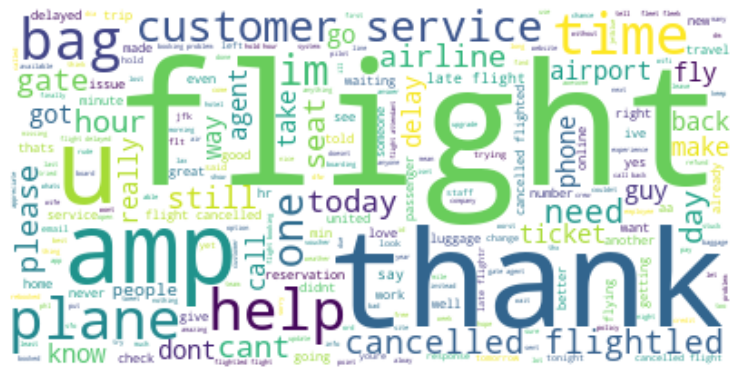

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()